In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [3]:
# Specify the path to your Excel file
csv_file_path = "D:\\2. DS-1\\insurance.csv"

# Read the Excel file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now you can work with the DataFrame, for example, printing the first few rows
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Necessary Steps for Encoding the columns according the nature of the data in the columns

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

In [9]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [10]:
from sklearn.preprocessing import StandardScaler

# Select the numeric predictor columns
numeric_columns = ['age', 'bmi', 'children']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the selected columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [11]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,16884.92400,0,0,1
1,-1.509965,1,0.509621,-0.078767,0,1725.55230,0,1,0
2,-0.797954,1,0.383307,1.580926,0,4449.46200,0,1,0
3,-0.441948,1,-1.305531,-0.908614,0,21984.47061,1,0,0
4,-0.513149,1,-0.292556,-0.908614,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,10600.54830,1,0,0
1334,-1.509965,0,0.206139,-0.908614,0,2205.98080,0,0,0
1335,-1.509965,0,1.014878,-0.908614,0,1629.83350,0,1,0
1336,-1.296362,0,-0.797813,-0.908614,0,2007.94500,0,0,1


# 1) First Assumption for Regression Analysis is there should not be any missing values in the Data, so that's why first I need to check missing values in the Dataframe.

In [12]:
df.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

It Shows that there is no missing values in the Data-Frame

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define your features and target variable
X = df[['age', 'bmi', 'children', 'sex', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']]
y = df['charges']

# Create a multilinear regression model
model = LinearRegression()

# Fit the model to the entire dataset
model.fit(X, y)

# Make predictions using the entire dataset
y_pred = model.predict(X)

# Evaluate the model (on the same data, which is not typical, but useful for demonstration)
r2 = r2_score(y, y_pred)

# Print model intercept and evaluation metrics
print("Model Intercept:", model.intercept_)
print("R-squared (R2):", r2)

# Print model coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Model Intercept: 9053.492450440157
R-squared (R2): 0.7509130345985207
Model Coefficients:
age: 3607.4727361941896
bmi: 2067.6919658434176
children: 572.9982099480684
sex: -131.31435939511468
smoker: 23848.53454191283
region_northwest: -352.9638994246452
region_southeast: -1035.0220493878176
region_southwest: -960.0509913008286


 MODEL EQUATION

y = 9053.49 + (3607.47 * x1) + (2067.69 * x2) + (572.99 * x3) + (-131.31 * x4) + (23848.53 * x5) + (-352.96 * x6) + (-1035.02 * x7) + (-960.05 * x8)

 x1 = age , x2 = bmi , x3 = children ,x4 = sex,

x5 = smoker, x6 = region_northwest , x7 = region_southeast , x8 = region_southwest


# 2) Second Assumption is the Mean of  All Errors should be '0' Zero.

In [20]:
# Calculate the errors
errors = y - y_pred
errors

0       -8408.789028
1       -1723.050534
2       -2257.526491
3       18229.640447
4       -1725.638186
            ...     
1333    -1750.775386
1334    -1305.950009
1335    -2519.298986
1336      761.360061
1337    -7944.262968
Name: charges, Length: 1338, dtype: float64

In [21]:
# Calculate the mean of errors
mean_error = errors.mean()

print("Mean of Errors:", mean_error)

Mean of Errors: -1.794518694081114e-12


Here, we can see that Mean of All Errors is not 0 ,but it is Negative, if we square the errors for understanding actual magnitude of errors.

In [22]:
# Calculate the squared errors
squared_errors = (y - y_pred) ** 2

# Calculate the mean squared error (MSE)
mse = squared_errors.mean()

print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 36501893.00741544


# 3) Third Assumption of Regression is, All Errors of the Model should be Normally Distributed.

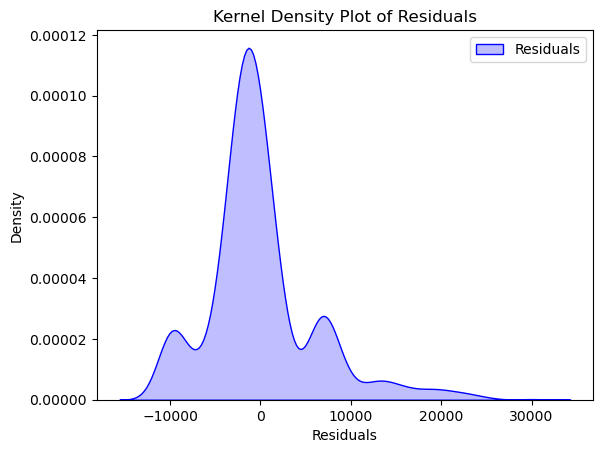

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y - y_pred

# Create a kernel density plot of the residuals
sns.kdeplot(residuals, fill=True, color='b', label='Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Residuals')
plt.legend(loc='upper right')
plt.show()


Here, It is observed that,this curve closely follows a normal distribution (bell-shaped), it suggests that the residuals are approximately normally distributed, which is one of the assumptions of linear regression.

The Curve is a roughly bell-shaped curve, which indicates a normal distribution. 

Due to, smaller sample sizes, the distribution may not appear perfectly normal.

As higher the sample sizes, the curve will become prefectly normal.

# 4) Forth, Assumption of Regression is Errors should not Correlated with all Independent Variables of Model.

In [26]:
import pandas as pd

# Calculate the residuals
residuals = y - y_pred

# Create a dataframe containing residuals and independent variables
residuals_df = pd.DataFrame({'Residuals': residuals})
independent_variables_df = X.copy()

# Concatenate residuals and independent variables
correlation_df = pd.concat([independent_variables_df, residuals_df], axis=1)

# Calculate correlations
correlations = correlation_df.corr()

# Display the correlation coefficients
print(correlations['Residuals'])


age                -9.189716e-16
bmi                 9.802889e-16
children           -3.937919e-15
sex                 6.380721e-16
smoker              2.590074e-16
region_northwest    1.852255e-16
region_southeast    1.164238e-16
region_southwest   -2.684589e-16
Residuals           1.000000e+00
Name: Residuals, dtype: float64


Here, we can see that there is a correlation between Errors and Independent Variables , however there should not be any correlation between them.

# 5) Fifth, assumption for Regression is Varience of all Independent Variables should be Same, there should not be more difference between the varience of All Independent Variables.
Principle Of Homescadacity Should be Followed.

In [27]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe containing only the independent variables (X)
X_df = pd.DataFrame(X, columns=['age', 'bmi', 'children', 'sex', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest'])

# Add a constant term (intercept) to the independent variables
X_with_const = sm.add_constant(X_df)

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display the VIF values
vif


,Variable,VIF
0,const,5.428992
1,age,1.016822
2,bmi,1.106630
3,children,1.004011
4,sex,1.008900
5,smoker,1.012074
6,region_northwest,1.518823
7,region_southeast,1.652230
8,region_southwest,1.529411


To check the variance or error of all independent variables in your linear regression model, it is calculated by the Variance Inflation Factor (VIF) for each independent variable. 

VIF measures the extent to which the variance of an independent variable is inflated due to multicollinearity (correlation between independent variables). 

High VIF values indicate that an independent variable is highly correlated with others, which can lead to unstable coefficient estimates.

High VIF values (typically greater than 5 or 10) may indicate multicollinearity and suggest that you should further examine the relationships between these variables or consider excluding some variables from your model.

Lower VIF values indicate lower multicollinearity and more stable coefficient estimates.

Here,we can say that there is no Multicolinearity in this Model.

# 6) Sixth Assumption for Regression is there should not be correlation or association between all Independent Vatiables.

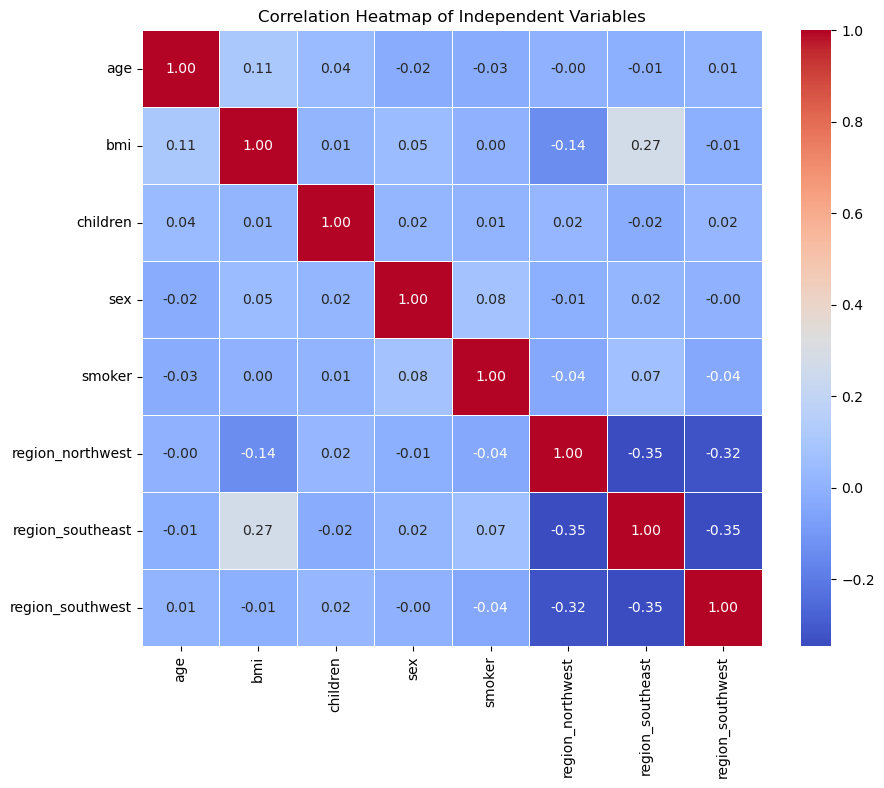

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe containing only the independent variables (X)
X_df = pd.DataFrame(X, columns=['age', 'bmi', 'children', 'sex', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest'])

# Calculate the correlation matrix
correlation_matrix = X_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Independent Variables')
plt.show()


The heatmap is a graphical representation of the correlation matrix.

Each cell in the heatmap represents the correlation coefficient between two independent variables. 

The color of each cell indicates the strength and direction of the correlation.

Colors typically range from blue (negative correlation) through white (no correlation) to red (positive correlation).

The numbers in each cell (annotated in the heatmap) represent the correlation coefficients.

Positive values indicate a positive correlation, meaning that as one variable increases, the other tends to increase as well.

Negative values indicate a negative correlation, meaning that as one variable increases, the other tends to decrease.

Values close to zero suggest little to no linear correlation between the variables.

Still here it is observed that, there is a Correlation and Association between Independent Variables.

# That's How All Assumption for Regression can be Checked.